In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('non_zero_data.csv')
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110


In [20]:
data['profit_margin'] = (data['revenue'] - data['budget']) / data['revenue']
data['log_profit_margin'] = data['profit_margin'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)
data['log_budget_revenue'] = data['budget_revenue_ratio'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)


# Print the DataFrame with the new 'profit_margin' column
data.head()

,adult,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,revenue,production_companies,budget,release_year,release_month,num_genres,release_season,budget_revenue_ratio,profit_margin,log_profit_margin,log_budget_revenue
0,False,"[18, 80]",278,en,136.776,1994-09-23,The Shawshank Redemption,8.704,25822,28341469.0,['Castle Rock Entertainment'],25000000.0,1994,9,2,Fall,0.882100,0.117900,0.111452,0.632388
1,False,"[18, 80]",238,en,107.889,1972-03-14,The Godfather,8.695,19602,245066411.0,"['Paramount', 'Alfran Productions']",6000000.0,1972,3,2,Spring,0.024483,0.975517,0.680830,0.024188
2,False,"[18, 80]",240,en,71.355,1974-12-20,The Godfather Part II,8.576,11849,102600000.0,"['Paramount', 'The Coppola Company']",13000000.0,1974,12,2,Winter,0.126706,0.873294,0.627699,0.119298
3,False,"[18, 36, 10752]",424,en,79.614,1993-12-15,Schindler's List,8.566,15229,321365567.0,['Amblin Entertainment'],22000000.0,1993,12,3,Winter,0.068458,0.931542,0.658319,0.066216
4,False,"[16, 10751, 14]",129,ja,120.883,2001-07-20,Spirited Away,8.541,15705,274925095.0,['Studio Ghibli'],19000000.0,2001,7,3,Summer,0.069110,0.930890,0.657981,0.066826


In [22]:
data['log_budget_revenue'].describe()

count    5745.000000
mean        0.614536
std         0.810742
min         0.000241
25%         0.200612
50%         0.367718
75%         0.699670
max        12.748727
Name: log_budget_revenue, dtype: float64

In [23]:
#compare the budget revenue ratio with profit margin to gain insights about financial state
#compare each movies financial state if they have properly budgeted 
financial_performance = pd.DataFrame(data[['log_budget_revenue','log_profit_margin']])
pd.set_option('display.max_rows', None)  # Set to None for unlimited rows
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns

print(financial_performance)
# financial_performance.head()

      log_budget_revenue  log_profit_margin
0               0.632388           0.111452
1               0.024188           0.680830
2               0.119298           0.627699
3               0.066216           0.658319
4               0.066826           0.657981
5               0.300105           0.500775
6               0.123986           0.624868
7               0.169034           0.596548
8               0.043167           0.670844
9               0.189962           0.582660
10              0.038969           0.673078
11              0.080669           0.650233
12              0.078066           0.651703
13              0.030382           0.677603
14              0.428001           0.382409
15              2.098901                NaN
16              0.348542           0.459322
17              0.083347           0.648715
18              1.913289                NaN
19              0.485303           0.318696
20              0.024904           0.680458
21              0.102282        

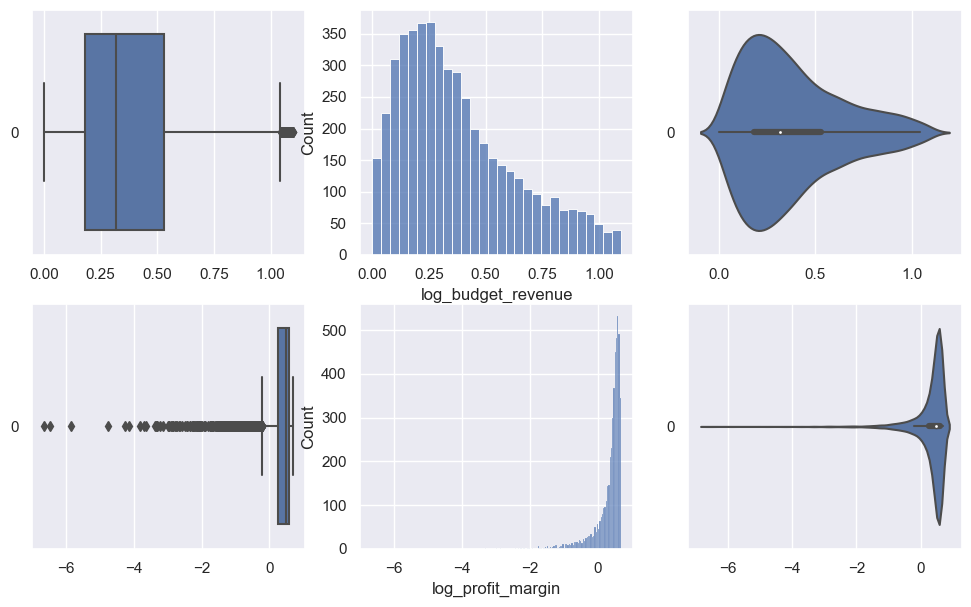

In [34]:
financial_performance = financial_performance.dropna()
financial_performance = financial_performance.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaNs after handling infinite values
financial_performance = financial_performance.dropna()

f, axes = plt.subplots(2, 3, figsize=(12, 7))

count = 0
for var in financial_performance:
    sb.boxplot(data = financial_performance[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = financial_performance[var], ax = axes[count,1])
    sb.violinplot(data = financial_performance[var], orient = "h", ax = axes[count,2])
    count += 1

                    log_budget_revenue  log_profit_margin
log_budget_revenue            1.000000          -0.839091
log_profit_margin            -0.839091           1.000000


<Axes: >

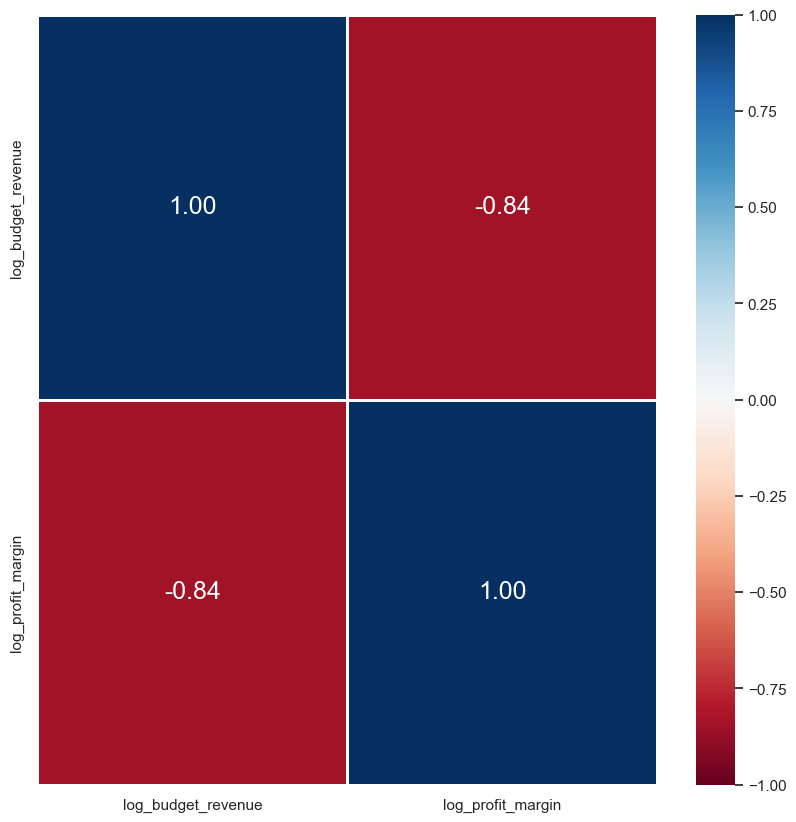

In [37]:
print(financial_performance.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(10, 10))
sb.heatmap(financial_performance.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

/Users/lermincheo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


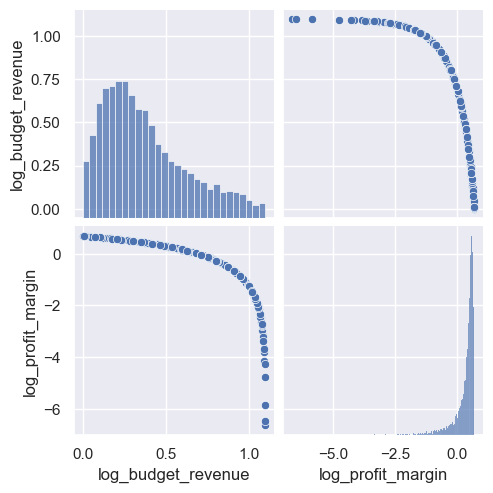

In [38]:
sb.pairplot(data = financial_performance)